In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras import applications
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

In [2]:
(train_data, train_labels),(test_data, test_labels) = cifar10.load_data()
print(train_data.shape,train_labels.shape,test_data.shape,test_labels.shape)

170500096/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
train_data = train_data.astype('float32')/255.0
test_data = test_data.astype('float32')/255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
cnn_model = Sequential([
      Conv2D(32,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same',input_shape=(32,32,3)),
      MaxPooling2D((2,2)),
      Dropout(0.25),

      Conv2D(32,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same'),
      MaxPooling2D((2,2)),
      Dropout(0.25),
    
      Conv2D(64,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same'),
      MaxPooling2D((2,2)),
      Dropout(0.25),
    
      Conv2D(64,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same'),
      Dropout(0.25),
    
      Conv2D(128,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same'),
      Dropout(0.25),
  
      Conv2D(128,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same'),
      MaxPooling2D((2,2)),
      Dropout(0.25),

      Flatten(),
      Dense(256,activation="relu"),
      Dropout(0.25),
      Dense(128,activation="relu"),
      Dropout(0.25),
      Dense(10,activation="softmax")
  ])

In [5]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          1

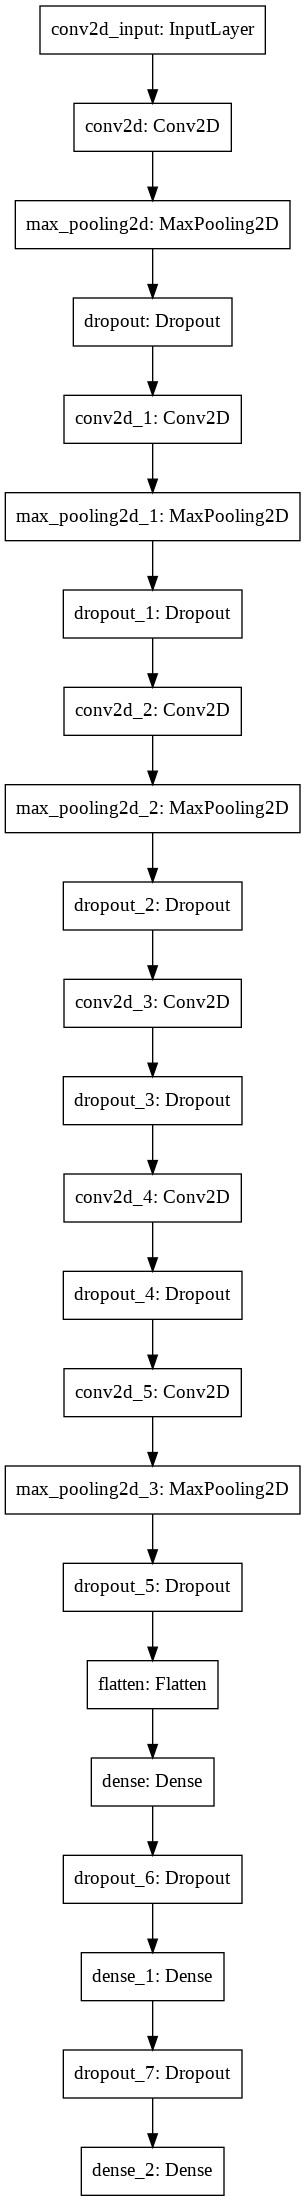

In [6]:
tf.keras.utils.plot_model(cnn_model)

In [7]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = cnn_model.fit(train_data, train_labels, epochs=5, batch_size=128, steps_per_epoch= train_data.shape[0]//128 , validation_data=(test_data, test_labels))

Epoch 1/5
390/390 [==============================] - 132s 334ms/step - loss: 1.9137 - accuracy: 0.2676 - val_loss: 1.6316 - val_accuracy: 0.3888
Epoch 2/5
390/390 [==============================] - 130s 333ms/step - loss: 1.5492 - accuracy: 0.4242 - val_loss: 1.4070 - val_accuracy: 0.4865
Epoch 3/5
390/390 [==============================] - 130s 334ms/step - loss: 1.3924 - accuracy: 0.4900 - val_loss: 1.4662 - val_accuracy: 0.4989
Epoch 4/5
390/390 [==============================] - 130s 333ms/step - loss: 1.3034 - accuracy: 0.5314 - val_loss: 1.2648 - val_accuracy: 0.5437
Epoch 5/5
390/390 [==============================] - 130s 332ms/step - loss: 1.2479 - accuracy: 0.5546 - val_loss: 1.1434 - val_accuracy: 0.5832


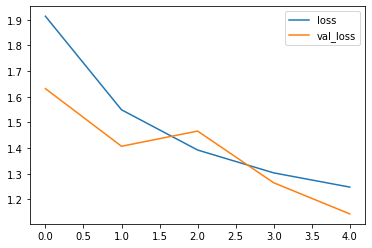

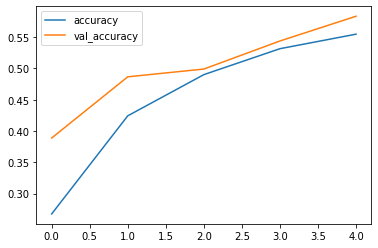

In [9]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [10]:
resnet_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (32,32,3))

res_output = resnet_model.output
res_output = GlobalAveragePooling2D()(res_output)
res_output = Dropout(0.7)(res_output)

94773248/94765736 [==============================] - 1s 0us/step


In [11]:
preds = Dense(10, activation= 'softmax')(res_output)
model = Model(inputs = resnet_model.input, outputs = preds)

In [12]:
model.compile(optimizer= Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [16]:
hist = model.fit(train_data, train_labels, batch_size=128, steps_per_epoch= train_data.shape[0]//128, validation_data=(test_data, test_labels), epochs = 5)

Epoch 1/5
390/390 [==============================] - 3580s 9s/step - loss: 2.0744 - accuracy: 0.4199 - val_loss: 3.2027 - val_accuracy: 0.1193
Epoch 2/5
390/390 [==============================] - 3594s 9s/step - loss: 1.5828 - accuracy: 0.5412 - val_loss: 12.5717 - val_accuracy: 0.1073
Epoch 3/5
390/390 [==============================] - 3555s 9s/step - loss: 1.7548 - accuracy: 0.4928 - val_loss: 44.7999 - val_accuracy: 0.1353
Epoch 4/5
390/390 [==============================] - 3564s 9s/step - loss: 1.8785 - accuracy: 0.4504 - val_loss: 1.9969 - val_accuracy: 0.3662
Epoch 5/5
390/390 [==============================] - 3526s 9s/step - loss: 1.3859 - accuracy: 0.5534 - val_loss: 1.3679 - val_accuracy: 0.5595


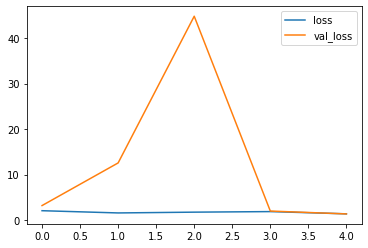

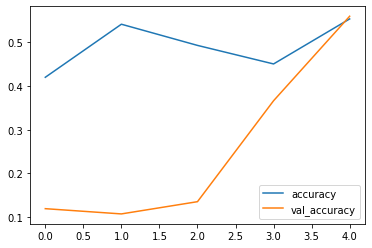

In [17]:
hist_frame = pd.DataFrame(hist.history)
hist_frame.loc[:, ['loss', 'val_loss']].plot()
hist_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [40]:
def residual_module(input, n_filters):
	merge_input = input
	if input.shape[-1] != n_filters:
		merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu')(input)
	
	conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu')(input)
	conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear')(conv1)

	output = keras.layers.add([conv2, merge_input])
	output = keras.layers.Activation('relu')(output)
	return output
 
input = Input(shape=(32, 32, 3))
output = residual_module(input, 128)
res_model = Model(inputs=input, outputs=output)
res_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 32, 32, 128)  3584        input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_35 (Conv2D)              (None, 32, 32, 128)  147584      conv2d_34[0][0]                  
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 32, 32, 128)  512         input_11[0][0]                   
____________________________________________________________________________________________

In [41]:
res_model.compile(optimizer= Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])